# Waterflow: Projet MLOps pour la Prédiction de la Qualité de l'Eau

Ce projet suit une approche MLOps structurée en 6 étapes pour développer un système de prédiction de la qualité de l'eau.

## Objectifs du Projet

1. **Veille et définition du MLOps**
2. **Utilisation d'un dataset de qualité de l'eau** (9 mesures, 3276 échantillons)
3. **Prétraitement et analyse exploratoire des données**
4. **Veille sur MLflow et installation de l'outil**
5. **Modélisation** : Random Forest/XGBoost OU Perceptron multicouches
6. **Évaluation des prédictions** avec métriques appropriées

## Installation des dépendances
```bash
pip install -r requirements.txt
```

# 1. Veille sur le Machine Learning Operations (MLOps)

## Définition du MLOps

Le **Machine Learning Operations (MLOps)** est un ensemble de pratiques et de technologies qui visent à industrialiser et automatiser le cycle de vie complet des modèles de machine learning en production.

### Définition claire et concise :

**MLOps = ML + DevOps + Data Engineering**

Il s'agit d'une approche collaborative qui permet de :
- **Développer** des modèles ML de manière reproductible
- **Déployer** ces modèles en production de façon fiable
- **Monitorer** et **maintenir** leur performance dans le temps
- **Automatiser** les processus de mise à jour et de réentraînement

### Composants clés du MLOps :

1. **Versioning** : Gestion des versions de code, données et modèles
2. **CI/CD pour ML** : Intégration et déploiement continus adaptés au ML
3. **Monitoring** : Surveillance de la performance et de la dérive des données
4. **Automatisation** : Pipelines automatisés pour l'entraînement et le déploiement
5. **Collaboration** : Facilitation du travail entre data scientists, ingénieurs et équipes métier

### Bénéfices du MLOps :

- **Reproductibilité** des expériences et résultats
- **Scalabilité** des solutions ML
- **Réduction du temps** de mise en production
- **Amélioration de la qualité** des modèles
- **Gouvernance** et compliance des modèles ML

Le MLOps permet ainsi de transformer des prototypes ML en solutions robustes et maintenables en production.

# 2. Utilisation de l'ensemble de données sur la qualité de l'eau

## Description du dataset

Ce projet utilise un ensemble de données contenant **9 mesures de qualité de l'eau** pour **3276 étendues d'eau différentes**.

### Variables du dataset :
1. **pH** : Niveau de pH de l'eau (0-14, optimal: 6.5-8.5)
2. **Hardness** : Dureté de l'eau, mesurée en mg/L
3. **Solids** : Total des solides dissous (TDS) en ppm
4. **Chloramines** : Concentration en chloramines en ppm
5. **Sulfate** : Concentration en sulfates en mg/L
6. **Conductivity** : Conductivité électrique en μS/cm
7. **Organic_carbon** : Carbone organique total en ppm
8. **Trihalomethanes** : Concentration en trihalométhanes en μg/L
9. **Turbidity** : Turbidité de l'eau en NTU (Nephelometric Turbidity Units)
10. **Potability** : Variable cible binaire (0 = non potable, 1 = potable)

## Importation des bibliothèques nécessaires

In [1]:
# Bibliothèques pour la manipulation de données
import pandas as pd
import numpy as np

# Bibliothèques pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 3. Chargement des données d'intérêt

In [2]:
# Chargement des données
# URL du dataset de qualité de l'eau
url = "https://raw.githubusercontent.com/MainakRepositor/Datasets/master/water_potability.csv"

try:
    # Chargement du dataset
    df = pd.read_csv(url)
    print("Dataset chargé avec succès!")
    print(f"Forme du dataset: {df.shape}")
    print(f"Colonnes: {list(df.columns)}")
    
except Exception as e:
    print(f"Erreur lors du chargement: {e}")
    print("Tentative de chargement local...")
    # Fallback vers un fichier local si disponible
    df = pd.read_csv("water_potability.csv")  # Si le fichier est téléchargé localement

Dataset chargé avec succès!
Forme du dataset: (3276, 10)
Colonnes: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [3]:
# Analyse exploratoire des données d'intérêt
print("="*50)
print("ANALYSE EXPLORATOIRE DES DONNÉES")
print("="*50)

# Informations générales
print("\n1. Informations générales:")
print(df.info())

print("\n2. Premières lignes du dataset:")
print(df.head())

print("\n3. Statistiques descriptives:")
print(df.describe())

print("\n4. Valeurs manquantes:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\n5. Distribution de la variable cible (Potability):")
potability_counts = df['Potability'].value_counts()
print(potability_counts)
print(f"Pourcentage d'eau potable: {(potability_counts[1] / len(df)) * 100:.2f}%")

ANALYSE EXPLORATOIRE DES DONNÉES

1. Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

2. Premières lignes du dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630

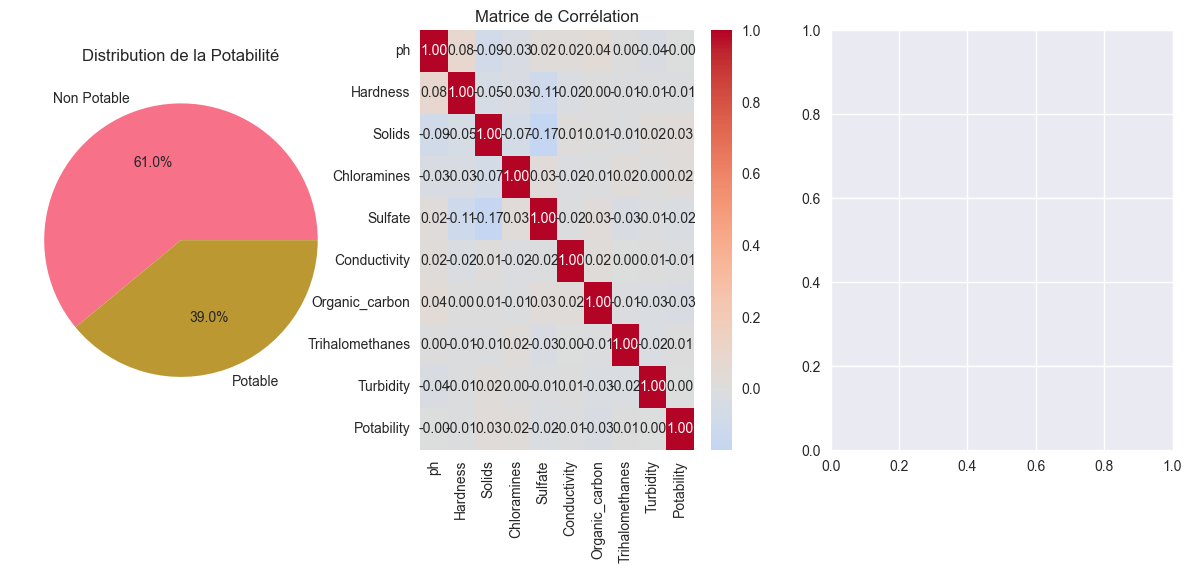

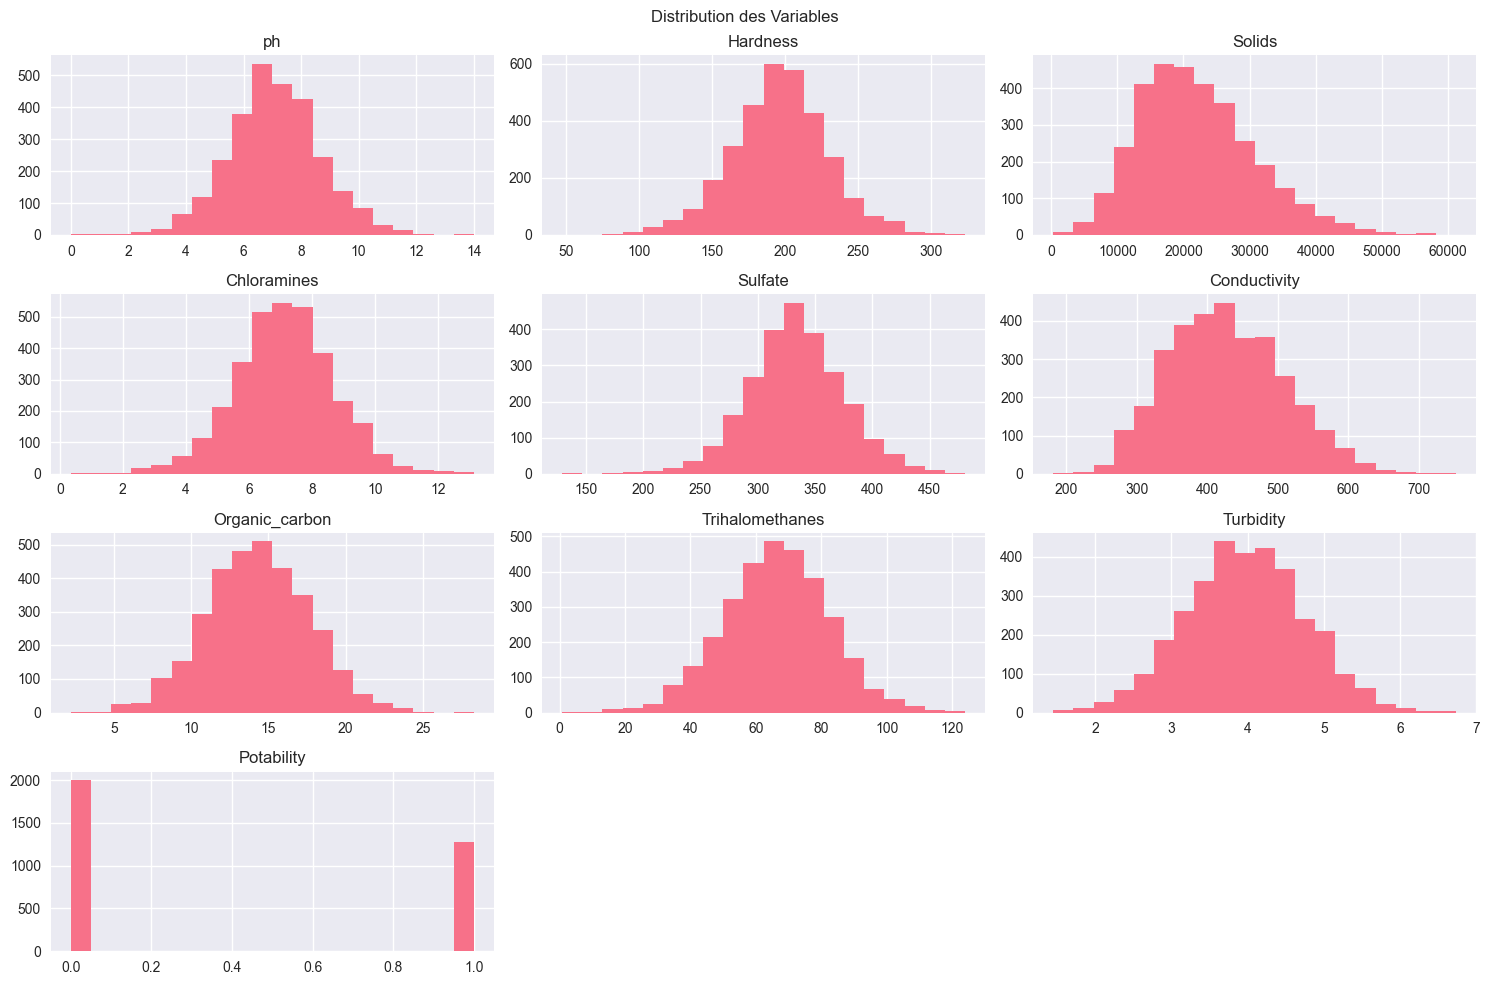

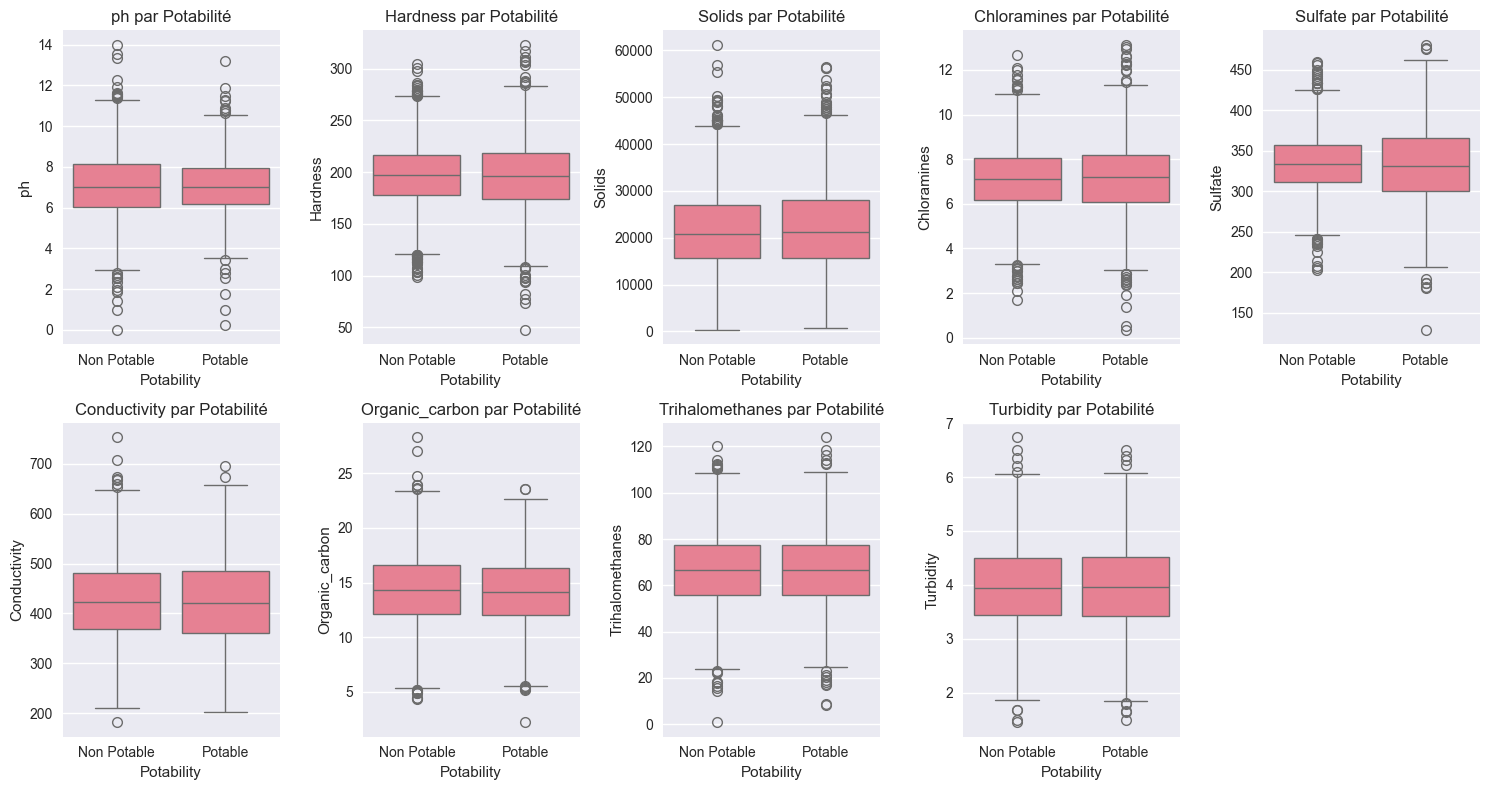

In [4]:
# Visualisations pour l'analyse exploratoire
plt.figure(figsize=(15, 12))

# 1. Distribution de la variable cible
plt.subplot(2, 3, 1)
potability_counts = df['Potability'].value_counts()
plt.pie(potability_counts.values, labels=['Non Potable', 'Potable'], autopct='%1.1f%%')
plt.title('Distribution de la Potabilité')

# 2. Matrice de corrélation
plt.subplot(2, 3, 2)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corrélation')

# 3. Distribution des variables numériques
plt.subplot(2, 3, 3)
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution des Variables')
plt.tight_layout()

# 4. Boxplots pour détecter les outliers
plt.figure(figsize=(15, 8))
numeric_columns = df.select_dtypes(include=[np.number]).columns[:-1]  # Exclure Potability
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 5, i+1)
    sns.boxplot(x=df['Potability'], y=df[col])
    plt.title(f'{col} par Potabilité')
    plt.xticks([0, 1], ['Non Potable', 'Potable'])

plt.tight_layout()
plt.show()

# 4. Veille sur MLflow et Installation

## Veille sur MLflow

**MLflow** est un outil puissant de gestion du cycle de vie de l'apprentissage automatique développé par Databricks. Il permet le suivi, le packaging et le versioning des modèles de Machine Learning, facilitant ainsi la reproduction et la comparaison des résultats.

### Composants principaux de MLflow :

1. **MLflow Tracking** : 
   - Enregistre et organise les expériences ML
   - Stocke paramètres, métriques, artefacts et modèles
   - Interface web pour visualiser et comparer les runs

2. **MLflow Projects** : 
   - Format standardisé pour packager le code ML
   - Reproductibilité des expériences
   - Exécution sur différents environnements

3. **MLflow Models** : 
   - Format standard pour empaqueter les modèles
   - Déploiement sur diverses plateformes
   - Support de multiples frameworks ML

4. **MLflow Model Registry** : 
   - Stockage centralisé des modèles
   - Versioning et gestion du cycle de vie
   - Collaboration entre équipes

### Étendue d'utilisation de MLflow :

- **Expérimentation** : Tracking automatique des hyperparamètres et métriques
- **Reproductibilité** : Environnements et dépendances versionnés
- **Collaboration** : Partage d'expériences entre data scientists
- **Déploiement** : Pipeline automatisé du développement à la production
- **Monitoring** : Suivi des performances des modèles déployés
- **Gouvernance** : Audit trail complet des modèles